# Unit 5: Data Storytelling

Note: Assessment Page Views is about (6million, 13) and most Jupyter notebook cannot handle most computations with it.
    
This notebook will be an example using the first 10000 rows of the dataset. The actual graphs will be created using

iPython in the terminal and will be exported. The graphs will be stored in the same folder as this notebook though.
    
## EDA Section 1: Assessment Page Views

Import relevant csv files derived from Assessment Page Views

**Questions/Trends:** 
    
Average Duration on each Assignment -  see if there is a trend over the course of more assignments

## EDA Section 2: Course Grades

Import relevant csv files derived from Course Grades/Grade export

**Questions/Trends:** 
    
Distribution of Final Scores - overall and for the scores below 70

Scatter plot of student grades and last login date - see if there is a correlation between the two

Average final score by section

Average final score by course

Count of low scoring students by section

Count of low scoring students by course


## EDA Section 3: Course Grades and Assessment Page Views

Use relevant csv files from Section 1 and 2

**Questions/Trends:**
    
Final Score in the class by average assignment duration - see if there is a correlation



In [ ]:
#Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import datetime

In [297]:
"""
EDA Section 1: Assessment Page Views
"""
#Assessment Page Views
df = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Page Views Fall 2018 Clean.csv', nrows = 10000, index_col = 0)
#Assessment Page Views columns: canvas_assignment_id, user_param_external_user_id, and Average Duration. Grouped by assignment id
df2 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assignment Duration Average with User Id.csv', nrows = 10000)
#Assessment Page Views columns: user_param_external_user_id, canvas_assignment_id, and Average Duration. Grouped by user id
"""
df3 will be a rearrangement of df2 that will be easier to work with.
"""
#Assessment Page Views columns: canvas_assignment_id and Average Duration. Grouped by assignment id
df4 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Assignment Duration Averages.csv', nrows = 10000)
#Assessment Page Views columns: canvas_assignment_id, user_param_external_user_id, and Average Duration. 
#Grouped by assignment Id. Filtered to find user id entries with above average duration. (This need to be grouped by user id eventually)
df5 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Students with Above Average Assignment Duration.csv', nrows = 10000, index_col = 0)

In [319]:
df2.head()

cols = ['user_param_external_user_id', 'canvas_assignment_id', 'Average Duration']
df3 = df2[cols]
df3.head()

,user_param_external_user_id,canvas_assignment_id,Average Duration
0,21650,22476.0,3453.500000
1,33479,31317.0,5811.400000
2,37111,40876.0,10265.000000
3,37478,40876.0,3075.000000
4,37993,40876.0,4410.333333


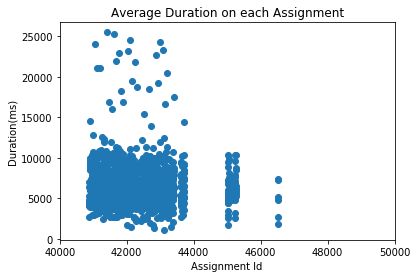

In [201]:
#Average Duration on each Assignment. 
#Using a scatter plot to see if there is a trend over the course of more assignments
_ = plt.scatter(data = df4, x = 'canvas_assignment_id', y = 'Average Duration')
_ = plt.xlim(40000, 50000)
_ = plt.title('Average Duration on each Assignment')
_ = plt.xlabel('Assignment Id')
_ = plt.ylabel('Duration(ms)')
plt.show()

In [115]:
"""
EDA Section 2: Course Grades
"""
#Contains student grade info, shown below.
grades = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Student Final Grades 2018 Anonymous.csv', index_col = 0)
#Contains student grade info for student that scored below 70; added column 'login time', shown below.
grades_below_70 = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades_and_login_times(below 70).csv', index_col = 0)


In [282]:
grades.head()

,student id,student sis,course,course id,course sis,section,section id,section sis,term,term id,term sis,current score,final score,enrollment state,unposted current score,unposted final score
0,37888,NaN,WELL1000 Foundations for Healthy Living - Howton,622,NaN,WELL 1000/01,1159,NaN,Fall 2018,20,NaN,87.42,86.29,active,87.42,86.29
1,37902,NaN,WELL1000 Foundations for Healthy Living - Howton,622,NaN,WELL 1000/01,1159,NaN,Fall 2018,20,NaN,94.90,93.67,active,94.90,93.67
2,37956,NaN,WELL1000 Foundations for Healthy Living - Howton,622,NaN,WELL 1000/01,1159,NaN,Fall 2018,20,NaN,94.31,93.09,active,94.31,93.09
3,38080,NaN,WELL1000 Foundations for Healthy Living - Howton,622,NaN,WELL 1000/01,1159,NaN,Fall 2018,20,NaN,97.18,95.92,active,97.18,95.92
4,38176,NaN,WELL1000 Foundations for Healthy Living - Howton,622,NaN,WELL 1000/01,1159,NaN,Fall 2018,20,NaN,84.40,83.30,active,84.40,83.30


In [180]:
grades_below70 = grades_below_70.sort_values('login time')
grades_below_70.head()

,course id,unposted final score,login time,student id,student sis,course,course sis,section,section id,section sis,term,term id,term sis,current score,final score,enrollment state,unposted current score
0,639,0.0,2018-08-13 10:46:00,38094,NaN,WELL1000 Foundations for Healthy Living - Onli...,NaN,WELL 1000/W72,1191,NaN,Fall 2018,20,NaN,0.0,0.0,active,0.0
1,659,0.0,2018-08-13 11:04:00,22168,NaN,WELL1000 Foundations for Healthy Living - Onli...,NaN,WELL 1000/W87,1230,NaN,Fall 2018,20,NaN,0.0,0.0,concluded,0.0
2,659,0.0,2018-08-13 03:19:00,37144,NaN,WELL1000 Foundations for Healthy Living - Onli...,NaN,WELL 1000/W87,1230,NaN,Fall 2018,20,NaN,0.0,0.0,concluded,0.0
3,638,0.0,2018-08-13 09:04:00,38000,NaN,WELL1000 Foundations for Healthy Living - Onli...,NaN,WELL 1000/W75,1190,NaN,Fall 2018,20,NaN,0.0,0.0,active,0.0
4,631,0.0,2018-08-14 01:12:00,38410,NaN,WELL1000 Foundations for Healthy Living - Onli...,NaN,WELL 1000/W63,1176,NaN,Fall 2018,20,NaN,0.0,0.0,active,0.0


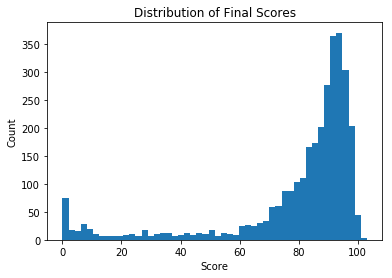

In [191]:
#Distribution of Final Scores
_ = plt.hist(x =grades['unposted final score'], bins = 50)
_ = plt.title('Distribution of Final Scores')
_ = plt.xlabel('Score')
_ = plt.ylabel('Count')
plt.show()

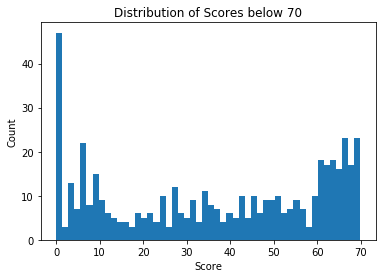

In [150]:
#Distribution of low scoring students
_ = plt.hist(x =grades_below_70['unposted final score'], bins = 50)
_ = plt.title('Distribution of Scores below 70')
_ = plt.xlabel('Score')
_ = plt.ylabel('Count')
plt.show()

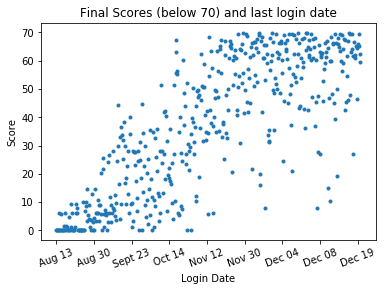

login time
2018-08-13 03:19:00    0.0
2018-08-13 09:04:00    0.0
2018-08-13 10:46:00    0.0
2018-08-13 11:04:00    0.0
2018-08-14 01:12:00    0.0
Name: unposted final score, dtype: float64

In [265]:
#Scatter plot of student grades and last login date
grades_below_70 = grades_below_70.sort_values('login time') 
time_series_df = grades_below_70.set_index('login time')
time_series_df = time_series_df.loc[:,'unposted final score']

#The dates are not evenly spaced out because the frequency of last logins is higher in December
xlabels = ['Aug 13', 'Aug 30', 'Sept 23', 'Oct 14', 'Nov 12', 'Nov 30', 'Dec 04', 'Dec 08', 'Dec 19']

_ = plt.axes(xticklabels = xlabels)
_ = plt.title('Final Scores (below 70) and last login date')
_ = plt.plot(time_series_df, linestyle = 'none', marker = '.')
_ = plt.xlabel('Login Date')
_ = plt.xticks(np.arange(0, 500, step=60), rotation=20)
_ = plt.ylabel('Score')
plt.show()
time_series_df.head()

In [183]:
#Average final score by section
section_avg_df = pd.DataFrame(grades.groupby(['section id'])['unposted final score'].mean())
print('\nAverage Score Grouped by Section ')
section_avg_df.columns = ['avg unposted final score']
print(section_avg_df.shape)

section_avg_df = section_avg_df.reset_index()
section_avg_df.head()



Average Score Grouped by Section 
(70, 1)
        section id  avg unposted final score
count    70.000000                 70.000000
mean   1206.871429                 79.274036
std      43.635487                  7.738668
min    1159.000000                 55.950000
25%    1180.250000                 75.430596
50%    1200.500000                 80.071033
75%    1219.750000                 84.338500
max    1384.000000                 92.963958


,section id,avg unposted final score
0,1159,86.415000
1,1160,78.252045
2,1161,78.416531
3,1164,74.921489
4,1165,83.806226


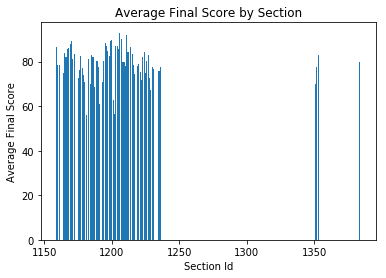

In [195]:
#Bar graph of average final score by section
_ = plt.bar(data = section_avg_df, x = 'section id', height = 'avg unposted final score')
_ = plt.title('Average Final Score by Section')
_ = plt.xlabel('Section Id')
_ = plt.ylabel('Average Final Score')
plt.show()

In [141]:
#Average score by course
course_avg_df = pd.DataFrame(grades.groupby(['course id'])['unposted final score'].mean())
print('\nAverage Score Grouped by Course ')
course_avg_df.columns = ['avg unposted final score']
print(course_avg_df.shape)

course_avg_df = course_avg_df.reset_index()
course_avg_df.head()


Average Score Grouped by Course 
(40, 1)


,course id,avg unposted final score
0,622,86.415000
1,623,76.531868
2,624,78.416531
3,626,83.038286
4,627,85.830972


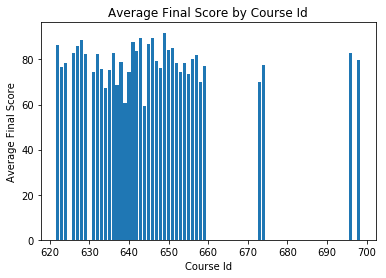

In [198]:
#Bar graph of average final score by course
_ = plt.bar(data = course_avg_df, x = 'course id', height = 'avg unposted final score')
_ = plt.title('Average Final Score by Course Id')
_ = plt.xlabel('Course Id')
_ = plt.ylabel('Average Final Score')
plt.show()

Shape
(69, 1)
   section id  Count
0        1159      1
1        1160      8
2        1161      8
3        1164      9
4        1165      6
Section with most low scorers
    section id  Count
26        1191     21


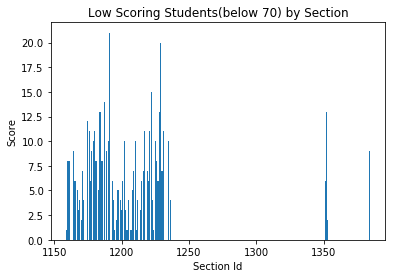

In [283]:
#Count of low scoring students by section
grades_bad_section_df = pd.DataFrame(grades_below_70.groupby(['section id'])['unposted final score'].count())
grades_bad_section_df.columns = ['Count']
print('Shape')
print(grades_bad_section_df.shape)

grades_bad_section_df = grades_bad_section_df.reset_index()
print(grades_bad_section_df.head())

print('Section with most low scorers')
print(grades_bad_section_df[grades_bad_section_df['Count'] == grades_bad_section_df['Count'].max()])

_ = plt.bar(data = grades_bad_section_df, x = 'section id', height = 'Count')
_ = plt.title('Low Scoring Students(below 70) by Section')
_ = plt.xlabel('Section Id')
_ = plt.ylabel('Score')
plt.show()


Shape
(40, 1)
   course id  Count
0        622      1
1        623     17
2        624      8
3        626     12
4        627      8
Course with most low scorers
    course id  Count
34        658     33


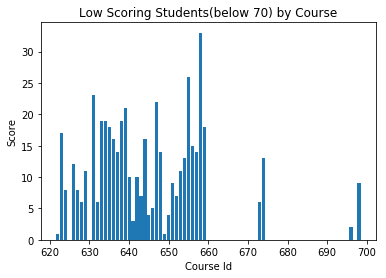

In [275]:
#Count of low scoring students by course
grades_bad_course_df = pd.DataFrame(grades_below_70.groupby(['course id'])['unposted final score'].count())
grades_bad_course_df.columns = ['Count']
print('Shape')
print(grades_bad_course_df.shape)
grades_bad_course_df = grades_bad_course_df.reset_index()
print(grades_bad_course_df.head())
print('Course with most low scorers')
print(grades_bad_course_df[grades_bad_course_df['Count'] == grades_bad_course_df['Count'].max()])
_ = plt.bar(data = grades_bad_course_df, x = 'course id', height = 'Count')
_ = plt.title('Low Scoring Students(below 70) by Course')
_ = plt.xlabel('Course Id')
_ = plt.ylabel('Score')
plt.show()

In [202]:
"""
EDA Section 3: Course Grades and Assessment Page Views
"""

'\nEDA Section 3: Course Grades and Assessment Page Views\n'

In [324]:
#Question
#Prep the data frames for merging
#Not everything will match up here with partial code. The actual graph will be made in iPython using the full dataset.
student_duration_averages = pd.DataFrame(df3.groupby(['user_param_external_user_id'])['Average Duration'].mean())
student_duration_averages = student_duration_averages.reset_index()
student_duration_averages.columns = ['student id', 'average duration']
print(student_duration_averages.shape)
student_duration_averages.head()

(484, 2)


,student id,average duration
0,1229,12304.000000
1,1669,5983.604369
2,1778,6253.875000
3,2641,6376.252979
4,12761,8504.857699


In [323]:
#Prep the dataframe for merging
student_final_grades = grades_below_70.loc[:, ['student id', 'unposted final score']]
print(student_final_grades.shape)
student_final_grades.head()


(490, 2)


,student id,unposted final score
2,37144,0.0
3,38000,0.0
0,38094,0.0
1,22168,0.0
4,38410,0.0


In [338]:
#Merge the dataframes.
student_duration_grades = pd.merge(student_duration_averages, student_final_grades, on = ['student id'], how = 'inner')

print(student_duration_grades.shape)
student_duration_grades.head()


(70, 3)


,student id,average duration,unposted final score
0,16467,5670.932960,69.41
1,18084,4993.342338,53.73
2,22030,6756.300000,49.60
3,23402,12209.915316,13.16
4,31673,5083.498509,45.74


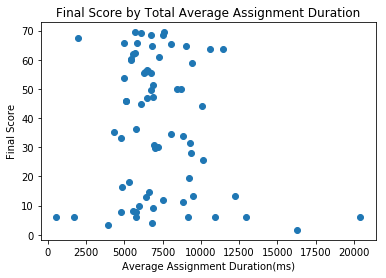

In [337]:
#Scatter plot of student_duration_grades

_ = plt.title('Final Score by Total Average Assignment Duration')
_ = plt.scatter(data = student_duration_grades, x = 'average duration', y = 'unposted final score')
_ = plt.xlabel('Average Assignment Duration(ms)')
_ = plt.ylabel('Final Score')
plt.show()

### Conclusion

Just report my findings here and what I might look into going forward.